## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [8]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [10]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [16]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [17]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 81us/step - loss: 1.9237 - acc: 0.3040 - val_loss: 1.7479 - val_acc: 0.3667
Epoch 2/100
50000/50000 [==============================] - 3s 53us/step - loss: 1.7109 - acc: 0.3875 - val_loss: 1.6645 - val_acc: 0.3999
Epoch 3/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.6285 - acc: 0.4188 - val_loss: 1.5744 - val_acc: 0.4431
Epoch 4/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.5586 - acc: 0.4447 - val_loss: 1.5946 - val_acc: 0.4466
Epoch 5/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.5091 - acc: 0.4610 - val_loss: 1.5023 - val_acc: 0.4667
Epoch 6/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.4704 - acc: 0.4759 - val_loss: 1.5131 - val_acc: 0.4598
Epoch 7/100
50000/50000 [==============================] - 3s 52us/step - 

50000/50000 [==============================] - 3s 51us/step - loss: 0.5545 - acc: 0.8021 - val_loss: 1.9792 - val_acc: 0.5082
Epoch 58/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.5349 - acc: 0.8074 - val_loss: 1.9980 - val_acc: 0.5064
Epoch 59/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.5300 - acc: 0.8093 - val_loss: 2.0213 - val_acc: 0.5102
Epoch 60/100
50000/50000 [==============================] - 3s 52us/step - loss: 0.5267 - acc: 0.8105 - val_loss: 2.0347 - val_acc: 0.5043
Epoch 61/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.5141 - acc: 0.8133 - val_loss: 2.0985 - val_acc: 0.5159
Epoch 62/100
50000/50000 [==============================] - 3s 57us/step - loss: 0.5102 - acc: 0.8174 - val_loss: 2.0991 - val_acc: 0.5098
Epoch 63/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.5029 - acc: 0.8184 - val_loss: 2.0834 - val_acc: 0.5076
Epoch 64/100
50000/50000 [==============

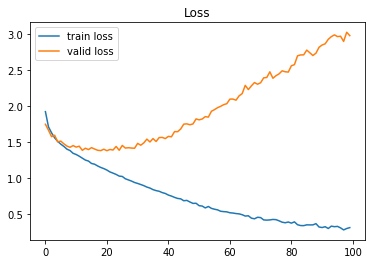

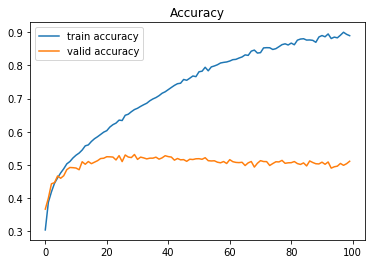

In [19]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()